### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.isna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#From data.info() we can see that most features are categorical and a few are numeric categorical types. Some features have null values, so need to check for the missing value in attributes.

In [7]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
#First we check dataset has any duplicate rows or not if a duplicate row is present then remove it.

In [9]:
duplicate = data[data.duplicated(keep = 'last')]
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12610, 26)


In [10]:
#74 rows were identified as duplicates and removed.


In [11]:
#We have to check for missing values in the data set before using any machine learning model.

In [12]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [13]:
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


In [14]:
#There are 6 attributes with missing values. 
#‘car’ feature has 99% of the missing value so we decide to drop this feature.
#Even if we had all cars information, this feature has less importance and doesn't affect our results.
#Other features like a bar, coffeehouse, carryaway, RestaurantLessThan20, and Restaurant20To50 have approx 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.

In [15]:
data = data.drop(['car'], axis=1)

In [16]:
#Mode imputation replaces missing values of a categorical feature with the most common value of that feature.

In [17]:

# mode imputation for missing values in data
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [18]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

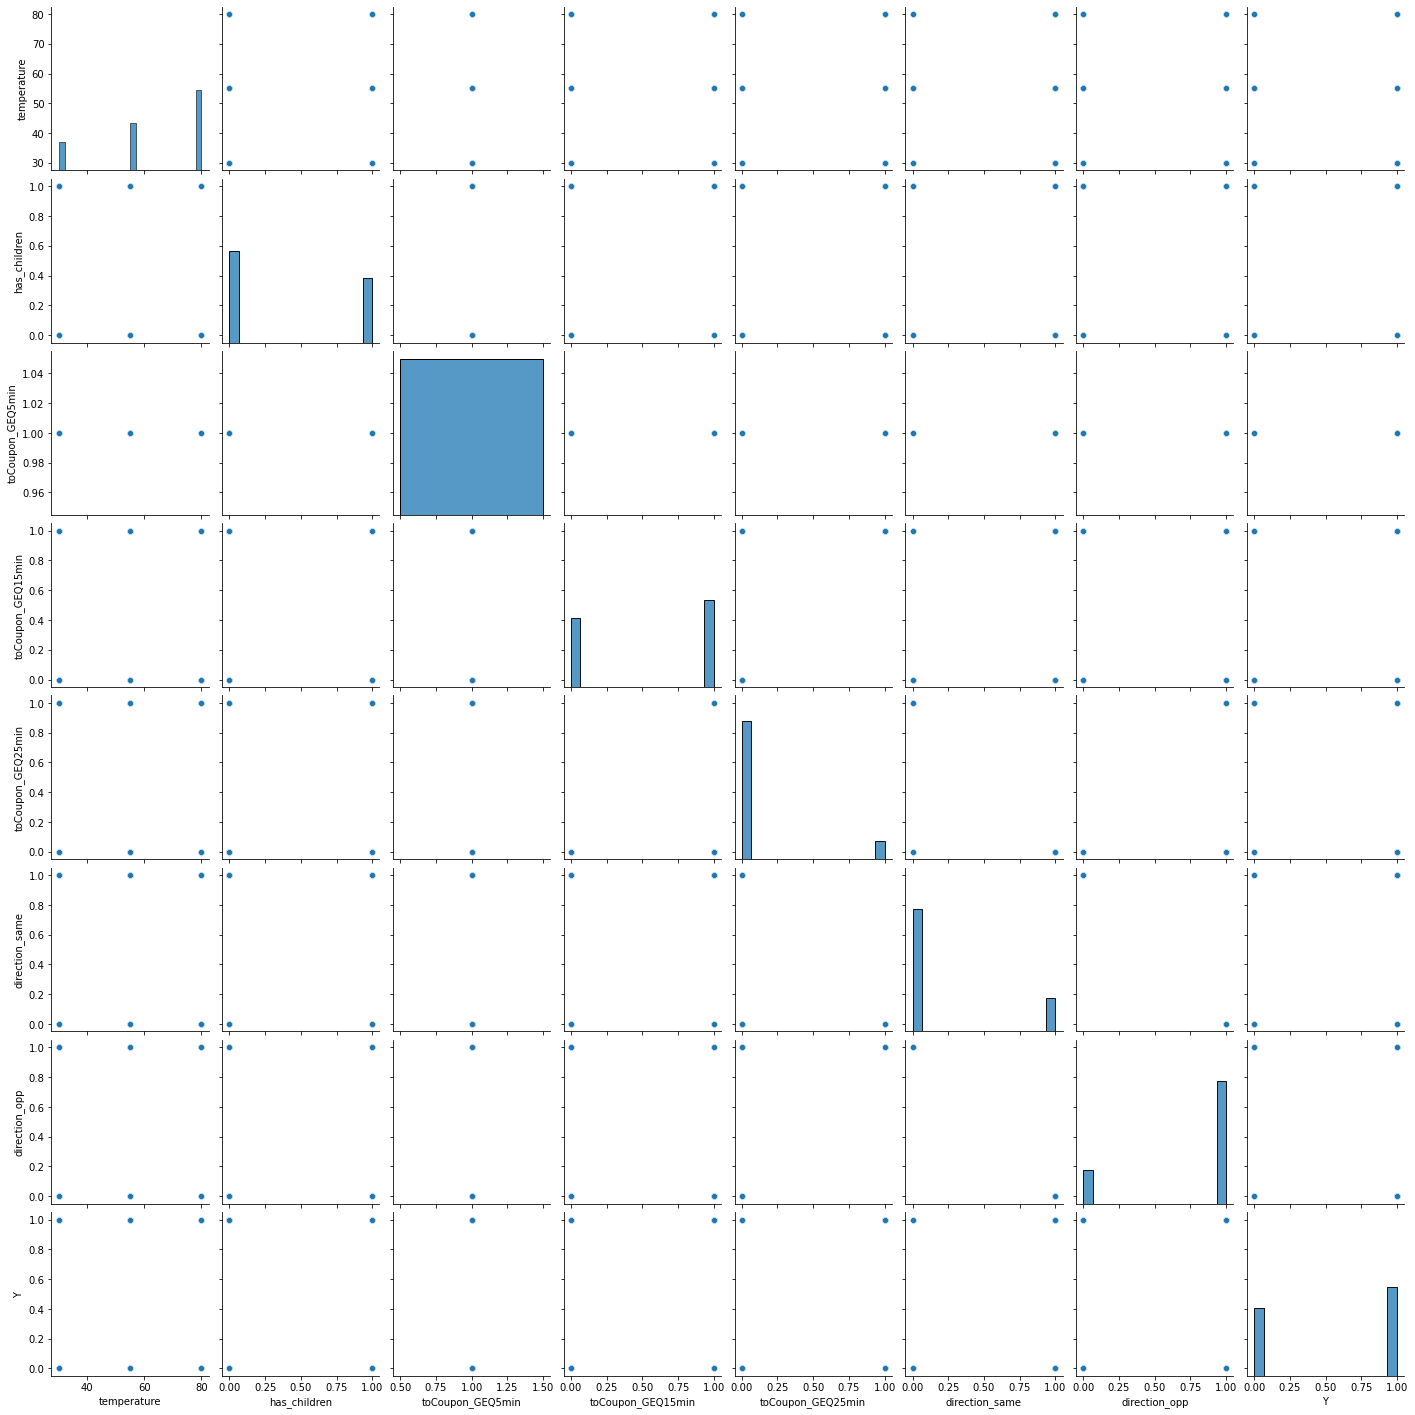

In [19]:
sns.pairplot(data)

4. What proportion of the total observations chose to accept the coupon? 



Text(0, 0.5, 'count')

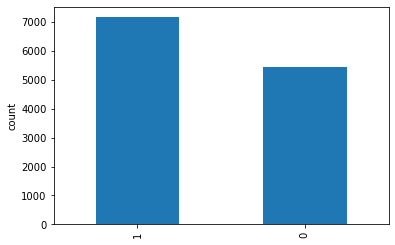

In [25]:
data['Y'].value_counts().plot.bar()
plt.ylabel('count')

In [44]:
Y_counts = data.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/data.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/data.shape[0]*100,3),'%')


Accepted coupon: 7157 56.757 %
Rejected coupon: 5453 43.243 %


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'count')

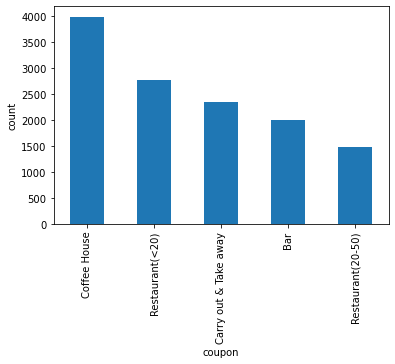

In [43]:
data['coupon'].value_counts().plot.bar()
plt.xlabel('coupon')
plt.ylabel('count')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:ylabel='Frequency'>

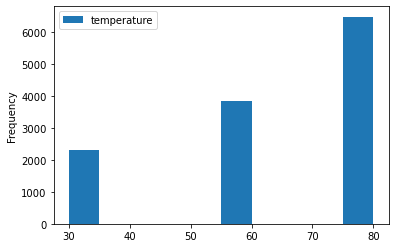

In [29]:
data.plot(kind='hist', y=['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
data_Bar=pd.DataFrame(data['Bar'])
data_Bar

,Bar
0,never
1,never
2,never
3,never
4,never
...,...
12679,never
12680,never
12681,never
12682,never


2. What proportion of bar coupons were accepted?


#After doing some online search I found this fantastic function that is very helpfull.
#Univariate Analysis

In [57]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name).Y.count())
    df_EDA['Accepted'] = list(data[data.Y==1].groupby(column_name).Y.count())
    df_EDA['Rejected'] = list(data[data.Y==0].groupby(column_name).Y.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise accepted coupons')
    plt.show()

    return df_EDA

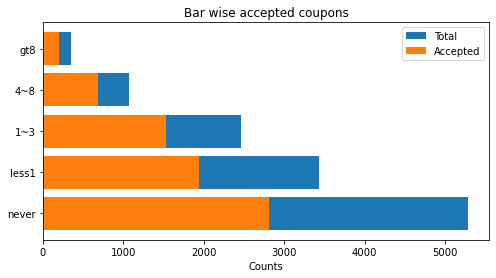

,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,never,5285,2806,2479,53.094,46.906
3,less1,3438,1936,1502,56.312,43.688
0,1~3,2468,1533,935,62.115,37.885
1,4~8,1071,681,390,63.585,36.415
2,gt8,348,201,147,57.759,42.241


In [59]:
univariate_analysis('Bar')

<AxesSubplot:xlabel='Bar', ylabel='count'>

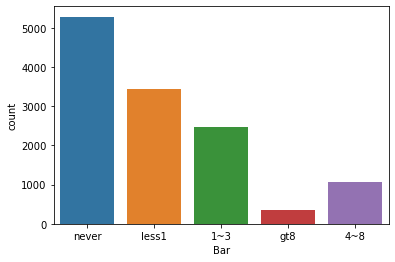

In [42]:
sns.countplot(x='Bar',data=data_Bar)

Text(0.5, 1.0, 'Bar Value Counts')

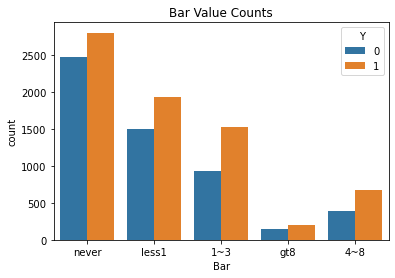

In [56]:
sns.countplot(x='Bar',data=data,hue='Y')
plt.title("Bar Value Counts")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


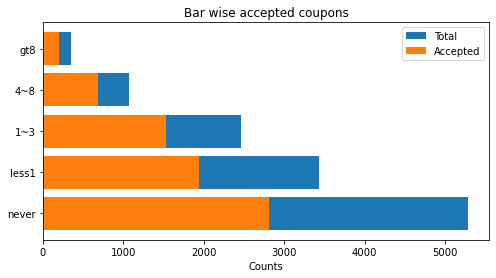

,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,never,5285,2806,2479,53.094,46.906
3,less1,3438,1936,1502,56.312,43.688
0,1~3,2468,1533,935,62.115,37.885
1,4~8,1071,681,390,63.585,36.415
2,gt8,348,201,147,57.759,42.241


In [66]:
data_Bar_less3_vs_more3 = univariate_analysis('Bar')
data_Bar_less3_vs_more3

In [202]:
e = data.query('Y==1 & Bar==("never","less1","1~3")' )
e['Y'].sum()



6275

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [215]:
data['age'].value_counts()

21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: age, dtype: int64

In [322]:
h=data.set_index('age')
i=h.drop(index = ['below21','50plus'])
w=i.reset_index()


In [324]:
e1 = w.query('Y==1 & Bar==("1~3","4~8","gt8") & age > "25"' )
a1=e1['Y'].sum()
a1


1467

In [328]:
e2 = data.query('Y==1 & Bar==("1~3","4~8","gt8") & age == "50plus"' )
a2=e2['Y'].sum()
a2

249

In [334]:
Drivers = a1 + a2

Drivers

1716

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [340]:
data['passanger'].value_counts()

Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: passanger, dtype: int64

In [343]:
data['occupation'].value_counts()

Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science                  169


In [354]:
s1 = data.query('occupation != "Farming Fishing & Forestry"')
s = s1.query('Y==1 & Bar==("1~3","4~8","gt8") & passanger==("Alone","Friend(s)","Partner")')
answer=s['Y'].sum()
answer

2293

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [358]:
s = data.query('Y==1 & Bar==("1~3","4~8","gt8") & passanger==("Alone","Friend(s)")')
ans1=s['Y'].sum()
ans1

2086

In [360]:
e1 = w.query('Y==1 & Bar==("1~3","4~8","gt8") & age < "30"' )
ans2=e1['Y'].sum()
ans2

1382

In [367]:
s = data.query('Y==1 & Bar==("4~8","gt8") & coupon=="Restaurant(<20)" & income == ("$25000 - $37499","$12500 - $24999","$37500 - $49999")')
ans3=s['Y'].sum()
ans3

91

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#There is more chance to get accepted coupons from drivers who are yanger and alone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  